In [1]:
import numpy as np
import pandas as pd

def generate_data(n_samples):
    # set random seed for reproducibility
    np.random.seed(123)
    
    # define means and standard deviations for continuous variables
    age_mean = 35
    age_std = 10
    
    monthly_income_mean = 3000
    monthly_income_std = 2000
   
    # generate continuous variables
    age = np.round(np.random.normal(age_mean, age_std, n_samples),0).astype(int)
    monthly_income = np.random.normal(monthly_income_mean, monthly_income_std, n_samples)
    
    # define parameter values for discrete variables
    distance_param = 0.3
    job_inv_param = 2
    job_sat_param = 3   
    work_life_bal_param = 3
    
    # generate discrete variables
    distance_from_home = np.random.negative_binomial(distance_param, 1-distance_param, n_samples)
    job_involvement = np.random.poisson(job_inv_param, n_samples)
    job_satisfaction = np.random.poisson(job_sat_param, n_samples)
    work_life_balance = np.random.poisson(work_life_bal_param, n_samples)
    
    # define category names and probabilities for categorical variables
    business_travel_cat = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
    business_travel_prob = [0.7, 0.2, 0.1]
    
    department_cat = ['Sales', 'Research & Development', 'Human Resources']
    department_prob = [0.4, 0.5, 0.1]
    
    education_field_cat = ['High School', 'Undergraduate', 'Masters', 'Phd']
    education_field_prob = [0.2, 0.4, 0.2, 0.2]
    
    marital_status_cat = ['Married', 'Single', 'Divorced']
    marital_status_prob = [0.4, 0.4, 0.2]
    
    gender_cat = ['Male', 'Female']
    gender_prob = [0.6, 0.4]

    # generate categorical variables
    business_travel = np.random.choice(business_travel_cat, n_samples, p=business_travel_prob)
    department = np.random.choice(department_cat, n_samples, p=department_prob)
    education_level = np.random.choice(education_field_cat, n_samples, p=education_field_prob)
    marital_status = np.random.choice(marital_status_cat, n_samples, p=marital_status_prob)
    gender = np.random.choice(gender_cat, n_samples, p=gender_prob)


    # combine all variables into a pandas dataframe
    data = pd.DataFrame({'Age': age,
                        'BusinessTravel': business_travel,
                        'Department': department,
                        'DistanceFromHome': distance_from_home,
                        'Education': education_level,
                        'Gender': gender,
                        'JobInvolvement': job_involvement,
                        'JobSatisfaction': job_satisfaction,
                        'MaritalStatus': marital_status,
                        'MonthlyIncome': monthly_income,
                        'OverTime': np.random.choice(['Yes', 'No'], n_samples, p=[0.25, 0.75]),
                        'TotalWorkingYears': np.random.randint(0, 40, n_samples),
                        'WorkLifeBalance': work_life_balance,
                        'YearsAtCompany': np.random.randint(0, 20, n_samples),
                        'YearsInCurrentRole': np.random.randint(0, 15, n_samples),
                        'YearsSinceLastPromotion': np.random.randint(0, 15, n_samples),
                        'YearsWithCurrManager': np.random.randint(0, 15, n_samples)})

    return data



In [2]:
employee_data = generate_data(15000)

employee_data.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,24,Travel_Rarely,Research & Development,0,Undergraduate,Female,0,3,Single,4815.128352,Yes,0,0,16,0,1,14
1,45,Travel_Frequently,Research & Development,0,Undergraduate,Male,2,1,Married,6370.434370,No,29,3,7,2,2,1
2,38,Travel_Rarely,Sales,0,Phd,Male,2,4,Single,767.381399,No,35,4,4,0,5,8
3,20,Travel_Rarely,Sales,0,Undergraduate,Male,3,4,Married,3307.147454,No,38,1,7,10,14,11
4,29,Travel_Rarely,Research & Development,0,Undergraduate,Female,3,2,Divorced,3111.506041,No,5,2,9,8,5,12


In [3]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      15000 non-null  int32  
 1   BusinessTravel           15000 non-null  object 
 2   Department               15000 non-null  object 
 3   DistanceFromHome         15000 non-null  int32  
 4   Education                15000 non-null  object 
 5   Gender                   15000 non-null  object 
 6   JobInvolvement           15000 non-null  int32  
 7   JobSatisfaction          15000 non-null  int32  
 8   MaritalStatus            15000 non-null  object 
 9   MonthlyIncome            15000 non-null  float64
 10  OverTime                 15000 non-null  object 
 11  TotalWorkingYears        15000 non-null  int32  
 12  WorkLifeBalance          15000 non-null  int32  
 13  YearsAtCompany           15000 non-null  int32  
 14  YearsInCurrentRole    

In [4]:
employee_data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'Gender', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# define the function to create the classification label
def create_label(row):
    if row['Department'] == 'Sales' and row['JobSatisfaction'] <= 3 and row['YearsSinceLastPromotion'] > 5:
        return 1
    elif row['Department'] == 'Human Resources' and row['YearsAtCompany'] < 3 and row['MaritalStatus'] == 'Married' and row['OverTime'] == 'Yes':
        return 1
    elif (row['Department'] == 'Research & Development' and row['YearsAtCompany'] > 8) or (row['OverTime'] == 'No' and row['YearsSinceLastPromotion'] < 4):
        return 0
    elif row['Age'] < 35 and row['Gender'] == 'Male' and row['BusinessTravel'] == 'Travel_Frequently' and ((row['YearsWithCurrManager'] < 2) or row['Education']=='Undergraduate'):
        return 1
    elif (row['Age'] > ((row['YearsWithCurrManager'] + row['TotalWorkingYears']) * row['YearsAtCompany'])) or ((row['MonthlyIncome'] > 300) and (row['JobInvolvement'] > 3)):
        return 1
    elif row['Age'] < 35 and row['MonthlyIncome'] < 3500 and row['Education'] == 'High School':
        return 1
    else:
        return 0
               

# apply the function to create the classification label for each row in the dataset
employee_data['Attrition'] = employee_data.apply(create_label, axis=1)

employee_data


,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,24,Travel_Rarely,Research & Development,0,Undergraduate,Female,0,3,Single,4815.128352,Yes,0,0,16,0,1,14,0
1,45,Travel_Frequently,Research & Development,0,Undergraduate,Male,2,1,Married,6370.434370,No,29,3,7,2,2,1,0
2,38,Travel_Rarely,Sales,0,Phd,Male,2,4,Single,767.381399,No,35,4,4,0,5,8,0
3,20,Travel_Rarely,Sales,0,Undergraduate,Male,3,4,Married,3307.147454,No,38,1,7,10,14,11,0
4,29,Travel_Rarely,Research & Development,0,Undergraduate,Female,3,2,Divorced,3111.506041,No,5,2,9,8,5,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,49,Travel_Frequently,Research & Development,0,Masters,Male,4,1,Single,143.439041,Yes,19,4,8,14,11,5,0
14996,61,Travel_Rarely,Sales,0,Undergraduate,Female,3,3,Married,3861.002351,No,24,1,17,7,13,3,1
14997,17,Travel_Rarely,Research & Development,2,Phd,Female,3,3,Married,710.548816,No,29,1,15,14,7,0,0
14998,45,Travel_Rarely,Research & Development,0,Undergraduate,Male,4,4,Divorced,2052.636722,No,7,5,6,4,5,3,1


The goal of this notebook is to to find out if an employee is more or less likely to quit their job. We will be predicting the 'Attrition' where Attrition = 0 means the employee will stay and Attrition = 1 means they quit their job.

We will start by performing some exploratory analysis to see the relationship between the different features and extract some valuable insights. Afterwards, we will apply various statistical models like logistic regression, random forest classification, svm etc to predict the attrition for an given employee.

Importing the required libraries


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      15000 non-null  int32  
 1   BusinessTravel           15000 non-null  object 
 2   Department               15000 non-null  object 
 3   DistanceFromHome         15000 non-null  int32  
 4   Education                15000 non-null  object 
 5   Gender                   15000 non-null  object 
 6   JobInvolvement           15000 non-null  int32  
 7   JobSatisfaction          15000 non-null  int32  
 8   MaritalStatus            15000 non-null  object 
 9   MonthlyIncome            15000 non-null  float64
 10  OverTime                 15000 non-null  object 
 11  TotalWorkingYears        15000 non-null  int32  
 12  WorkLifeBalance          15000 non-null  int32  
 13  YearsAtCompany           15000 non-null  int32  
 14  YearsInCurrentRole    

In [5]:
employee_data['OverTime'] = employee_data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
employee_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,24,Travel_Rarely,Research & Development,0,Undergraduate,Female,0,3,Single,4815.128352,1,0,0,16,0,1,14
1,45,Travel_Frequently,Research & Development,0,Undergraduate,Male,2,1,Married,6370.434370,0,29,3,7,2,2,1
2,38,Travel_Rarely,Sales,0,Phd,Male,2,4,Single,767.381399,0,35,4,4,0,5,8
3,20,Travel_Rarely,Sales,0,Undergraduate,Male,3,4,Married,3307.147454,0,38,1,7,10,14,11
4,29,Travel_Rarely,Research & Development,0,Undergraduate,Female,3,2,Divorced,3111.506041,0,5,2,9,8,5,12


## EDA

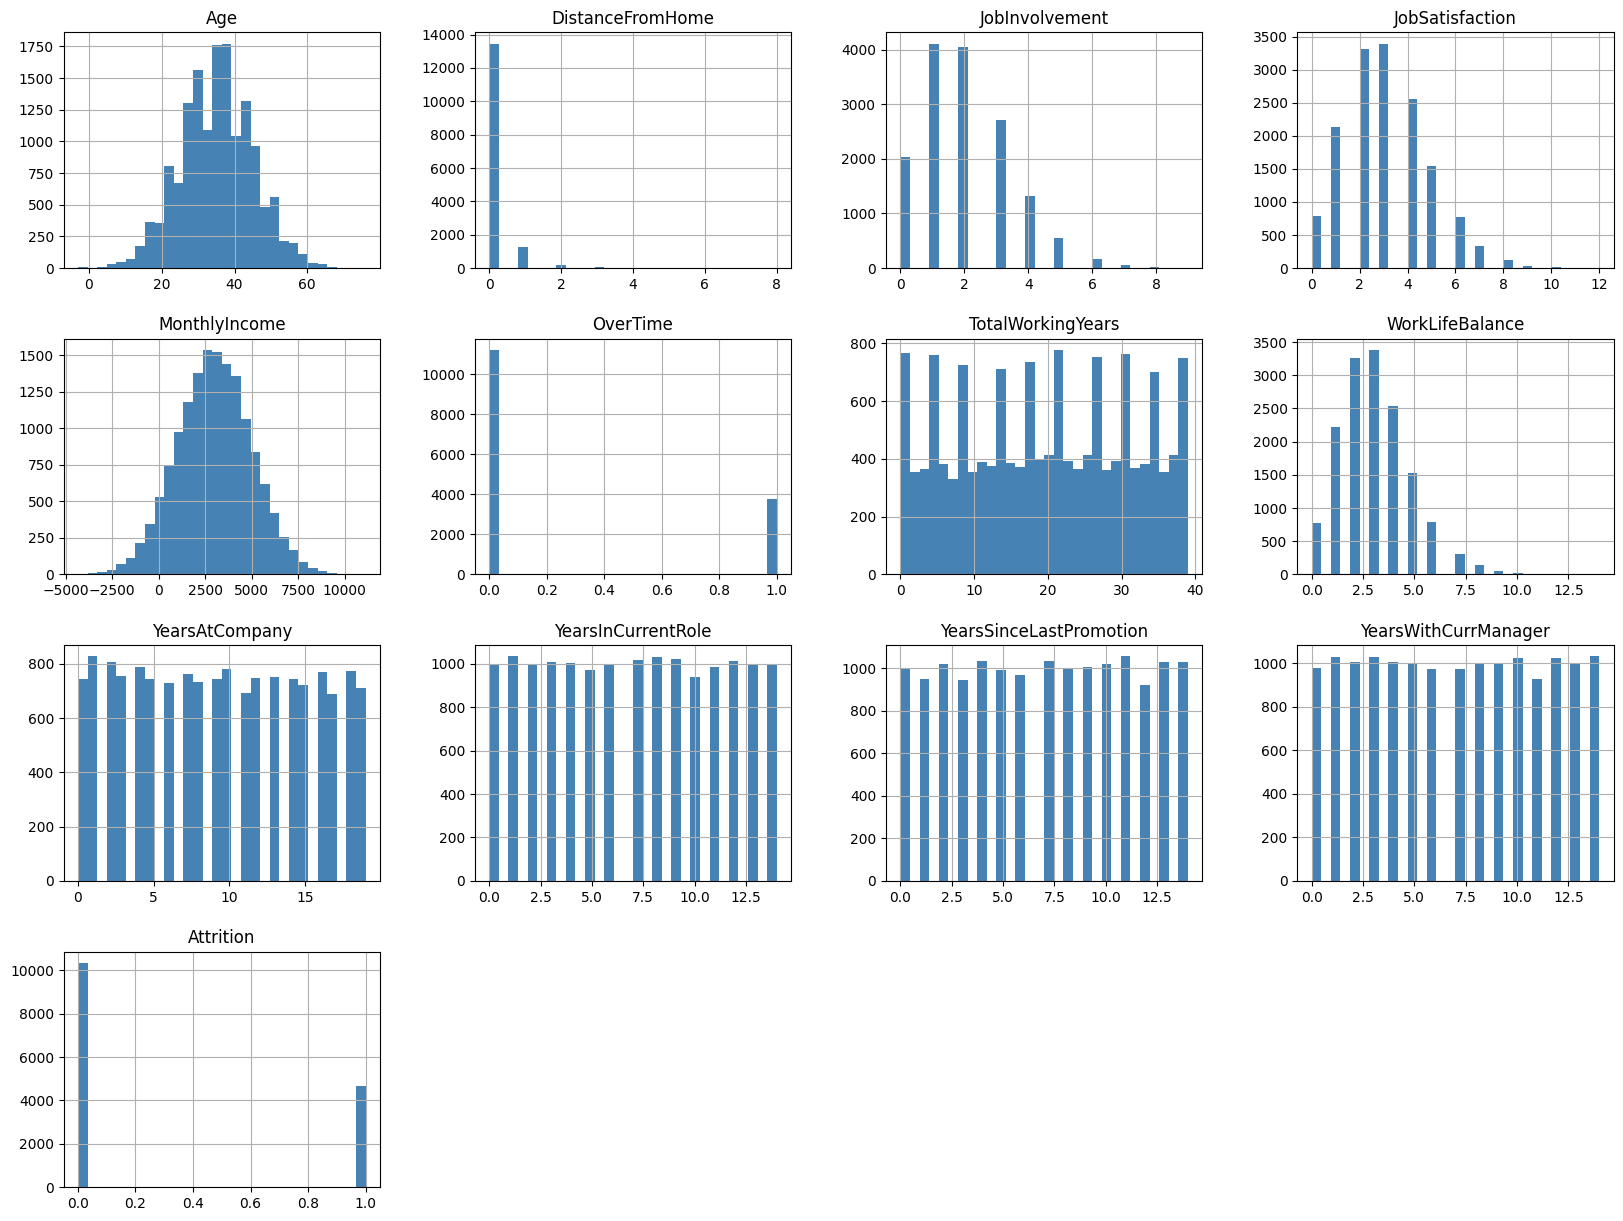

In [10]:
employee_data.hist(bins = 30, figsize = (20,15), color='steelblue')

plt.show()
     


Checking how many Atrrition = 1 and Attrition = 0 we have. Since it is our response variable, ideally we would like an equal number of each type.

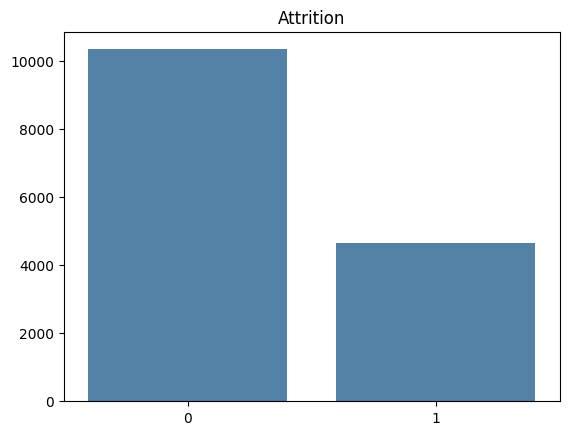

In [11]:
unique, counts = np.unique(employee_data['Attrition'], return_counts=True)

sns.barplot(y = counts, x = unique, color='steelblue')
plt.title('Attrition')

plt.show()

## Data Preprocessing

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cat_var = employee_data.columns[employee_data.dtypes == 'object']
num_var = employee_data.columns[employee_data.dtypes != 'object']

y = employee_data['Attrition']

numeric_var = num_var.drop('Attrition')

Preprocess = ColumnTransformer([
    ('oneHotEncoding', OneHotEncoder(drop='first'), cat_var),
    ('Scale', StandardScaler(), numeric_var)
])

emp_data = Preprocess.fit_transform(employee_data)

X = pd.DataFrame(emp_data)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 123)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from joblib import dump

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)
     
model_metrics = pd.DataFrame(columns = ['Model Name','Accuracy', 'Recall', 'Precision', 'f1 score'])

def get_metrics(model_name,model, X_test, y_test, df):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_pred, y_test)
  precision = precision_score(y_true = y_test, y_pred = y_pred)
  recall = recall_score(y_true = y_test, y_pred = y_pred)
  f1 = (2 * precision * recall)/(precision + recall)
  df.loc[len(df.index)] = [model_name, accuracy, recall, precision, f1]

  return df

In [59]:
model_metrics = get_metrics('logistic', model, X_test, y_test, model_metrics)     

model_metrics

,Model Name,Accuracy,Recall,Precision,f1 score
0,logistic,0.821067,0.631944,0.746667,0.684532


In [18]:
dump(model, 'Models\logistic_model.joblib')

['Models\\logistic_model.joblib']

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=123)

Hyperparameter tuning:

In [19]:
n_estimators = [int(i) for i in np.linspace(100, 1000, num = 15)]
max_features = ['sqrt']
max_depth = [int(i) for i in np.linspace(5,50, num = 5)]
min_sample_split = [2,5,10]
min_sample_leaf = [2,4,6]
bootstrap = [True, False]

param_grid = {'n_estimators':n_estimators,
'max_features': max_features,
'max_depth':max_depth,
'min_samples_split': min_sample_split,
'min_samples_leaf': min_sample_leaf,
'bootstrap': bootstrap
}

rf_random = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter = 15, random_state=123)

In [20]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123),
                   n_iter=15,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 16, 27, 38, 50],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 164, 228, 292,
                                                         357, 421, 485, 550,
                                                         614, 678, 742, 807,
                                                         871, 935, 1000]},
                   random_state=123)

In [21]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [22]:
best_model = rf_random.best_estimator_
     
model_metrics = get_metrics('random_forest', best_model, X_test, y_test, model_metrics)

NameError: name 'get_metrics' is not defined

Saving the model

In [ ]:
# save the best estimator to a file
dump(best_model, r'Models\rf_model.joblib')

['Models\\rf_model.joblib']

In [61]:
model_metrics

,Model Name,Accuracy,Recall,Precision,f1 score
0,logistic,0.821067,0.631944,0.746667,0.684532
1,random_forest,0.955200,0.877604,0.973988,0.923288


Feture importance plot


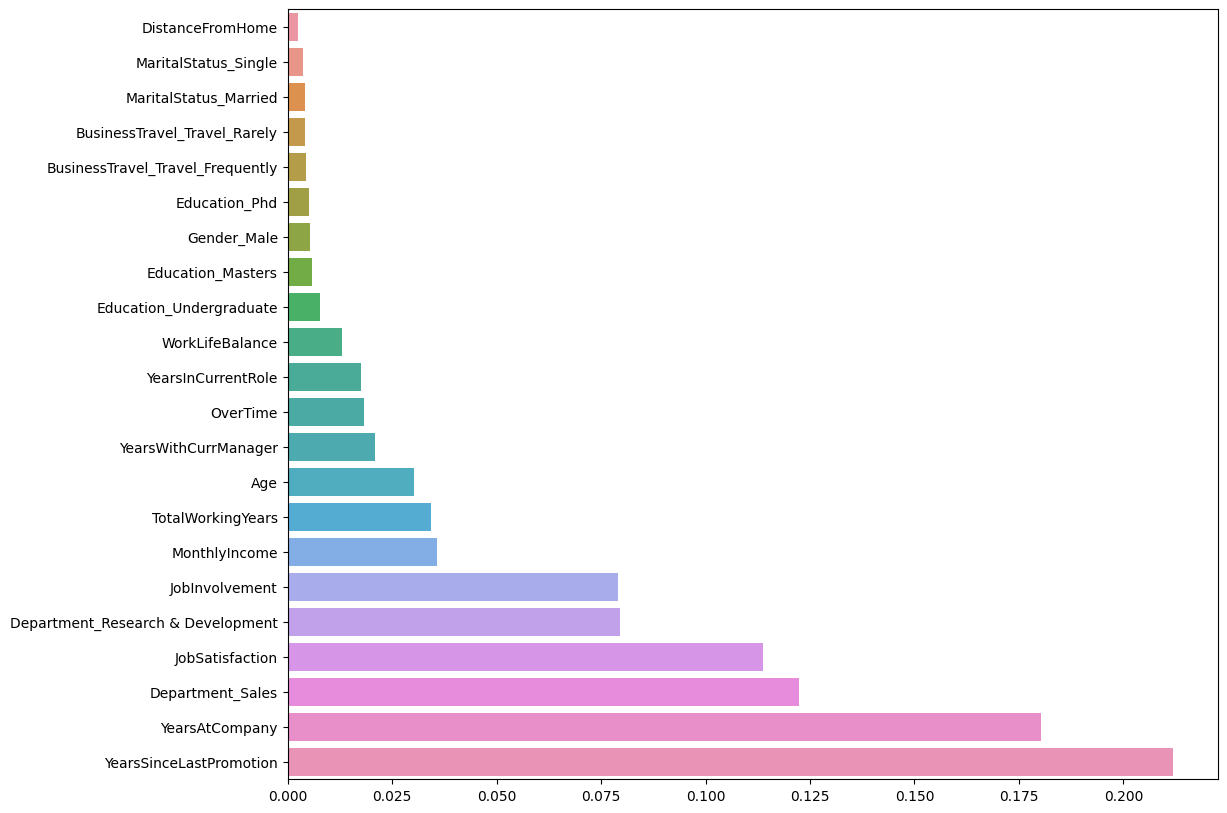

In [26]:
fig, ax = plt.subplots(ncols=1, figsize=(12,10))

idx = best_model.feature_importances_.argsort()
m = Preprocess.get_feature_names_out()[idx]
feature_names = [i.split('__')[1] for i in m]


sns.barplot(y= feature_names, x = best_model.feature_importances_[idx], ax = ax)

plt.show()

XGBoost


In [27]:
import xgboost as xgb

xgb_class = xgb.XGBClassifier(random_state = 123)

Hyperparameter tuning


In [28]:
n_estimators = [int(i) for i in np.linspace(100, 1000, num = 15)]
max_depth = [int(i) for i in np.linspace(5,30, num = 5)]
learning_rate = [0.01, 0.1, 0.3]
subsample = [0.5, 0.1, 0.2]



param_grid = {'n_estimators':n_estimators,
'max_depth':max_depth,
'subsample': subsample,
'learning_rate': learning_rate,
'colsample_bytree': np.arange(0.4, 1.0, 0.1),
'colsample_bylevel': np.arange(0.4, 1.0, 0.1)
}

random_xgb = RandomizedSearchCV(estimator= xgb_class, param_distributions=param_grid, n_iter = 20)

In [29]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=123, ...),
                   n_iter=20,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [5, 11, 17, 23, 30],
                                        'n_estimators': [100, 164, 228, 292,
                                                         357, 421, 485, 550,
                                                         614, 678, 742, 807,
                                                         871, 935, 1000],
                                        'subsample': [0.5, 0.1, 0.2]})

In [30]:
random_xgb.best_params_

{'subsample': 0.5,
 'n_estimators': 1000,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.4}

In [63]:
best_xgb = random_xgb.best_estimator_   

model_metrics = get_metrics('XGBoost', best_xgb, X_test, y_test, model_metrics)

In [32]:
# save the best estimator to a file
dump(best_xgb, r'Models\xgb_model.joblib')

['Models\\xgb_model.joblib']

In [64]:
model_metrics

,Model Name,Accuracy,Recall,Precision,f1 score
0,logistic,0.821067,0.631944,0.746667,0.684532
1,random_forest,0.955200,0.877604,0.973988,0.923288
2,XGBoost,0.980800,0.951389,0.985612,0.968198


SVM


In [47]:
from sklearn import svm

clf = svm.SVC()

In [48]:
param_grid = {'C':[0.1, 1, 10, 100],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'rbf']
#'gamma':[1, 0.1, 0.01, 0.001],
#'kernel': ['linear']
}

random_svc = RandomizedSearchCV(clf, param_grid, n_iter = 15)

In [49]:
random_svc.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']})

In [50]:
random_svc.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [65]:
best_svc = random_svc.best_estimator_


model_metrics = get_metrics('SVM', best_svc, X_test, y_test, model_metrics)

In [66]:
model_metrics

,Model Name,Accuracy,Recall,Precision,f1 score
0,logistic,0.821067,0.631944,0.746667,0.684532
1,random_forest,0.955200,0.877604,0.973988,0.923288
2,XGBoost,0.980800,0.951389,0.985612,0.968198
3,SVM,0.912000,0.842014,0.867621,0.854626


In [67]:
# save the best estimator to a file
dump(best_svc, r'Models\svm_model.joblib')

['Models\\svm_model.joblib']

In [68]:
model_metrics.to_csv(r'data\model_metric.csv', index=False)

XGBoost has the highest f1 score which combines both recall and precision. Since this is an unbalanced dataset, we will use f1 score instead of accuracy as our main KPI.

XGBoost has a recall of 0.98 which means the model was able to correctly predict that an employee quit (Attrition = 1) 98% of the time. Moreover, when the model predicted Attrition = 1, it was correct 97% of the time. So overall the model is performing really well.


In [69]:
# For SVM
y_pred = best_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2598
           1       0.87      0.84      0.85      1152

    accuracy                           0.91      3750
   macro avg       0.90      0.89      0.90      3750
weighted avg       0.91      0.91      0.91      3750



In [70]:
# For SVM
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2598
           1       0.99      0.95      0.97      1152

    accuracy                           0.98      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.98      0.98      0.98      3750



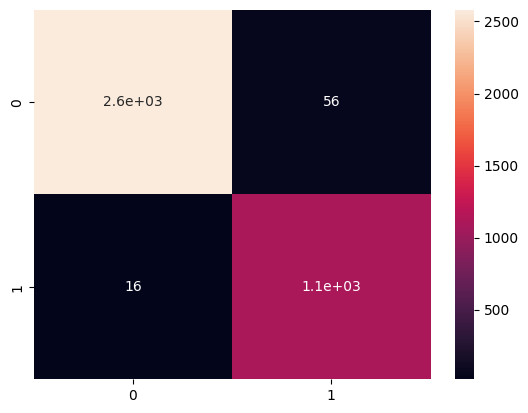

In [71]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
plt.show()
     
